In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Таблицы

In [2]:
address = pd.read_csv('addresses.csv')

In [3]:
address.head(3)

,id,phone_id
0,41,1
1,8531,2
2,2982657,2


In [4]:
sample = pd.read_csv('sample_submission.csv', sep = ';')

In [5]:
sample.head(3)

,Id,Predicted
0,19843,NaN
1,471287,NaN
2,342522,NaN


In [6]:
train = pd.read_csv('train.csv')

In [7]:
train.head(3)

,phone_id,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0


### Users

In [8]:
users = pd.read_csv('user_profiles.csv')

In [9]:
users.head(3)

,user_id,gender,bdate
0,2226207,NaN,NaN
1,2226207,NaN,NaN
2,2226207,NaN,NaN


In [10]:
len(set(users['user_id']))

120913

In [11]:
users = users.drop_duplicates(subset = ['user_id'], ignore_index = True)

In [12]:
users['age'] = np.nan
users['birthday_month'] = np.nan
for i in users.index:
    if users['bdate'][i]:
        a = str(users['bdate'][i])
        if a.count('-') == 2:
            users['age'][i] = 2020 - int(a.split('-')[0])
            users['birthday_month'][i] = int(a.split('-')[1])
        elif a.count('.') == 2:
            users['age'][i] = 2020 - int(a.split('.')[2])
            users['birthday_month'][i] = int(a.split('.')[1])
        elif a.count('/') == 2:
            users['age'][i] = 2020 - int(a.split('/')[2])
            users['birthday_month'][i] = int(a.split('/')[1])

In [13]:
users.head(10)

,user_id,gender,bdate,age,birthday_month
0,2226207,NaN,NaN,NaN,NaN
1,1684318,male,1987-10-11,33.0,10.0
2,2103797,NaN,NaN,NaN,NaN
3,2226212,NaN,NaN,NaN,NaN
4,931514,NaN,NaN,NaN,NaN
5,2226215,NaN,NaN,NaN,NaN
6,355641,NaN,NaN,NaN,NaN
7,2226219,NaN,NaN,NaN,NaN
8,1290242,male,1982-09-24,38.0,9.0
9,2226234,NaN,NaN,NaN,NaN


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120913 entries, 0 to 120912
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120913 non-null  int64  
 1   gender          47814 non-null   object 
 2   bdate           47744 non-null   object 
 3   age             47642 non-null   float64
 4   birthday_month  47642 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ MB


In [15]:
#users.to_csv('cleaned_users.csv', index = True, sep = ',')

### Shipments

In [15]:
ship_1 = pd.read_csv('shipments2020-01-01.csv')
ship_2 = pd.read_csv('shipments2020-03-01.csv')
ship_3 = pd.read_csv('shipments2020-04-30.csv')
ship_4 = pd.read_csv('shipments2020-06-29.csv')

In [16]:
ship_1.head(3)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53


In [17]:
ship_2.head(3)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at
0,4077,4058639,178163,1291559,2017-05-10 10:16:41,2020-03-13 11:57:53,2020-03-15 12:00:00,METRO,canceled,canceled,Москва,1,158.0,0,courier,0.0,27610,web,windows,NaN
1,48861,271117,383088,3015822,2018-02-27 10:48:13,2020-04-24 21:09:15,2020-04-30 07:00:00,METRO,complete,shipped,Москва,3,499.0,0,courier,0.0,87806,web,windows,2020-04-30 12:53:17
2,3119,276189,385477,3019844,2018-03-01 11:58:09,2020-04-25 17:30:52,2020-04-26 12:00:00,METRO,complete,shipped,Москва,14,158.0,0,courier,0.0,23029,web,windows,2020-04-26 11:54:23


In [18]:
ships = pd.concat([ship_1, ship_2, ship_3, ship_4])

In [19]:
ships.head(3)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53


In [20]:
ships.shape

(2260686, 20)

## Merges

In [21]:
ships_users = ships.merge(users, how = 'left', on='user_id')

In [22]:
ships_users.shape

(2260686, 24)

In [23]:
ships_users['Wait']  = pd.to_datetime(ships_users['shipped_at']) - pd.to_datetime(ships_users['order_completed_at'])

In [24]:
ships_users['Wait hours'] = ships_users['Wait'].apply(lambda x: (x.seconds)/3600)

In [25]:
ships_users.head(3)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,...,total_weight,platform,os,shipped_at,gender,bdate,age,birthday_month,Wait,Wait hours
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,...,30170,web,windows,2020-02-20 08:08:54,NaN,NaN,NaN,NaN,1 days 18:01:54,18.031667
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,...,11305,web,windows,2020-01-03 18:10:40,NaN,NaN,NaN,NaN,0 days 05:01:14,5.020556
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,13589,app,ios,2020-02-13 12:33:53,NaN,NaN,NaN,NaN,0 days 23:54:25,23.906944


In [27]:
# train.head(20)

### Добавляем таблицу lines (доп. ноутбук)

In [26]:
shipmnet_agg = pd.read_csv('products_per_shipment_aggregation_v2_.csv')

In [27]:
shipmnet_agg['percent_of_discount'] = shipmnet_agg['total_discount']/shipmnet_agg['total_price_without_dicsount']*100
shipmnet_agg['average_price'] = shipmnet_agg['total_price_without_dicsount']/shipmnet_agg['total_number_of_products']

In [28]:
shipmnet_agg.head(3)

,shipment_id,total_number_of_products,total_number_of_unique_products,total_price_without_dicsount,total_discount,cancelled,replaced,percent_of_discount,average_price
0,178163,43,31,7489.499998,320.939995,7,0,4.285199,174.174419
1,273988,113,81,33582.100059,2102.400017,9,4,6.260478,297.186726
2,322307,47,24,3529.400031,1198.849987,1,0,33.967529,75.093618


In [29]:
ships_final = ships_users.merge(shipmnet_agg, how = 'left', on='shipment_id')

In [30]:
ships_final.head(3)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,...,Wait,Wait hours,total_number_of_products,total_number_of_unique_products,total_price_without_dicsount,total_discount,cancelled,replaced,percent_of_discount,average_price
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,...,1 days 18:01:54,18.031667,47.0,24.0,3529.400031,1198.849987,1.0,0.0,33.967529,75.093618
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,...,0 days 05:01:14,5.020556,58.0,37.0,4160.300014,445.019999,1.0,0.0,10.696825,71.729311
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,...,0 days 23:54:25,23.906944,67.0,49.0,14572.929970,2062.969996,0.0,1.0,14.156179,217.506417


In [31]:
# Колонка чтобы соединить с train
ships_final["order_completed_at_month"] = ships_final["order_completed_at"].apply(lambda x: x[:4+1+2])

In [32]:
ships_final['order_completed_at_month_month'] = ships_final["order_completed_at_month"].apply(lambda x: int(x[5:7]))

In [33]:
# Есть ли у человека день рождения в следующем месяце
ships_final['birthday_next_month'] = 0
ships_final['birthday_next_month'][ships_final['birthday_month'] == ships_final['order_completed_at_month_month']
                                   + 1] = 1

In [34]:
ships_final['app'] = 0
ships_final['app'][ships_final['platform'] == 'app'] = 1

In [35]:
ships_final['canceled_order'] = 0
ships_final['canceled_order'][ships_final['s.order_state'] == 'canceled'] = 1

In [36]:
ships_final['gender_float'] = np.nan
ships_final['gender_float'][ships_final['gender'] == 'female'] = 0
ships_final['gender_float'][ships_final['gender'] == 'male'] = 1

In [37]:
ships_final_address = ships_final.merge(address, how = 'left', left_on='ship_address_id', right_on = 'id')

### Messages

In [38]:
messages = pd.read_csv('messages.csv')
actions = pd.read_csv('actions.csv')

In [39]:
messages.head(3)

,sent,action_id,user_id
0,1.588847e+09,1512.0,1775692
1,1.588847e+09,1512.0,1775687
2,1.588847e+09,1512.0,1775684


In [40]:
actions.head(3)

,id,subject,body,type
0,239,NaN,NaN,push
1,77,NaN,NaN,push
2,213,Бесплатно доставим вам первый заказ👍,"Оформляйте скорее, доставим в удобное время!",push


In [41]:
actions['full_body'] = 0
actions['full_body'][actions['body'].isna() == False] = 1

In [42]:
del actions['subject']
del actions['body']
del actions['type']

In [43]:
messages_act = messages.merge(actions, how = 'left', left_on = 'action_id', right_on = 'id')

In [44]:
sum(messages_act['full_body'])/len(messages_act['full_body'])

0.603777585429823

In [45]:
messages_act['sent'] = messages_act['sent'].apply(lambda x: datetime.fromtimestamp(x).strftime("%Y-%m"))

In [46]:
messages_act = messages_act.drop_duplicates(['sent', 'user_id'])

In [47]:
messages_act_full = messages_act[messages_act['full_body'] == 1]

In [48]:
ships_final_address_mess = ships_final_address.merge(messages_act_full, how = 'left', left_on=['user_id',
                                    'order_completed_at_month'], right_on = ['user_id', 'sent'])

In [51]:
ships_final_address_mess['full_body'] = ships_final_address_mess['full_body'].fillna(0)

In [ ]:
sum(ships_final_address_mess['full_body'])/len(ships_final_address_mess['full_body'])

In [55]:
ships_final_address_agg = ships_final_address_mess.groupby(["phone_id", "order_completed_at_month"]).agg({
    "shipment_id" : "count",
    "canceled_order" : "sum", 
    "promo_total" : "sum",
    "total_cost" : "sum",
    "rate": "min",
    "promo_total" : "sum",
    "total_weight": "mean",
    "app" : "sum", #
    "gender_float" : "first",
    "age" : "first",
    "Wait hours": "mean",
    "total_number_of_products" : "sum",
    "total_number_of_unique_products" : "sum",
    "total_price_without_dicsount" : "sum",
    "total_discount": "sum",
    "cancelled": "sum",
    "replaced" : "sum",
    "percent_of_discount" : "mean",
    "average_price" : "mean",
    "birthday_next_month" : "first",
    "full_body" : "first"
}).reset_index()

In [56]:
# процент отмененных заказов
ships_final_address_agg['percent_cancelled_orders'] = ships_final_address_agg['canceled_order'
                                                            ]/ships_final_address_agg['shipment_id']*100

In [57]:
# Если человек пользовался приложением хотя бы 1 раз, то пишем, что он пользуется приложением
ships_final_address_agg['app'][ships_final_address_agg['app'] > 0] = 1

In [58]:
# Средние затраты
ships_final_address_agg['mean_cost'] = ships_final_address_agg['total_cost']/ships_final_address_agg['shipment_id']

In [59]:
ships_final_address_agg.shape

(1155789, 24)

In [60]:
ships_final_address_agg.head()

,phone_id,order_completed_at_month,shipment_id,canceled_order,promo_total,total_cost,rate,total_weight,app,gender_float,...,total_price_without_dicsount,total_discount,cancelled,replaced,percent_of_discount,average_price,birthday_next_month,full_body,percent_cancelled_orders,mean_cost
0,2,2020-01,1,0,0.0,98.0,0,22024.0,0,NaN,...,4165.310007,1567.479999,1.0,0.0,37.631773,109.613421,0,1.0,0.0,98.0
1,2,2020-02,2,0,0.0,366.0,0,33973.0,0,NaN,...,6698.850044,1608.159993,1.0,2.0,24.042164,76.205223,0,1.0,0.0,183.0
2,2,2020-03,1,0,0.0,233.0,0,34195.0,0,NaN,...,4976.890036,1168.499990,0.0,2.0,23.478517,95.709424,0,0.0,0.0,233.0
3,2,2020-05,1,0,0.0,248.0,0,40777.0,0,NaN,...,5401.380020,720.089998,3.0,5.0,13.331593,100.025556,0,0.0,0.0,248.0
4,3,2020-03,2,0,0.0,0.0,5,15632.5,0,NaN,...,7900.390059,4795.750013,5.0,1.0,63.839549,49.740509,0,0.0,0.0,0.0


In [61]:
ships_final_address_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155789 entries, 0 to 1155788
Data columns (total 24 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   phone_id                         1155789 non-null  int64  
 1   order_completed_at_month         1155789 non-null  object 
 2   shipment_id                      1155789 non-null  int64  
 3   canceled_order                   1155789 non-null  int64  
 4   promo_total                      1155789 non-null  float64
 5   total_cost                       1155789 non-null  float64
 6   rate                             1155789 non-null  int64  
 7   total_weight                     1155789 non-null  float64
 8   app                              1155789 non-null  int64  
 9   gender_float                     41377 non-null    float64
 10  age                              41068 non-null    float64
 11  Wait hours                       1117836 non-null 

In [62]:
ships_final_address_agg[['Wait hours', 'average_price', 'percent_of_discount'
                        ]] = ships_final_address_agg[['Wait hours', 'average_price', 'percent_of_discount'
                        ]].fillna(ships_final_address_agg[['Wait hours', 'average_price', 'percent_of_discount'
                                                          ]].mean())

In [48]:
# ships_final_address_agg.drop_duplicates(['phone_id', 'order_completed_at_month'])

### Merge с train

In [63]:
final_train = ships_final_address_agg.merge(train, how = 'inner',
                                                        left_on=['phone_id', 'order_completed_at_month'],
                                            right_on = ['phone_id', 'order_completed_at'])

In [64]:
# ships_final_address_agg.to_csv('ships_final_address_agg_mess.csv', index=None, sep = ',')

In [19]:
# final_train.to_csv('final_train_dataset.csv', index=None, sep = ',')

# Тренируем модель

In [4]:
# final_train = pd.read_csv('final_train_dataset.csv', sep = ',')
# ships_final_address_agg = pd.read_csv('ships_final_address_agg.csv', sep = ',')

In [65]:
final_train.head(3)

,phone_id,order_completed_at_month,shipment_id,canceled_order,promo_total,total_cost,rate,total_weight,app,gender_float,...,cancelled,replaced,percent_of_discount,average_price,birthday_next_month,full_body,percent_cancelled_orders,mean_cost,order_completed_at,target
0,2,2020-01,1,0,0.0,98.0,0,22024.0,0,NaN,...,1.0,0.0,37.631773,109.613421,0,1.0,0.0,98.0,2020-01,1.0
1,2,2020-02,2,0,0.0,366.0,0,33973.0,0,NaN,...,1.0,2.0,24.042164,76.205223,0,1.0,0.0,183.0,2020-02,1.0
2,2,2020-03,1,0,0.0,233.0,0,34195.0,0,NaN,...,0.0,2.0,23.478517,95.709424,0,0.0,0.0,233.0,2020-03,0.0


In [66]:
final_train.shape

(692773, 26)

In [20]:
columns = list(final_train.columns)
# x_columns = columns[2:-2]
x_columns = ['promo_total', 'total_cost', 'total_weight', 
             'Wait hours', 'total_number_of_products', 'total_number_of_unique_products', 
             'total_price_without_dicsount', 'total_discount', 'percent_of_discount', 
             'average_price', 'mean_cost', 'full_body']

In [67]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)

In [68]:
from tpot import TPOTClassifier

# Make tpot pipeline
tpot_pipeline = TPOTClassifier(generations=10, population_size=10,
cv=tss, scoring='f1',
n_jobs=-1, verbosity=2,
random_state=50)

In [144]:

if True:
    x_columns = [ 'promo_total', 'total_cost', 'total_weight', 'percent_cancelled_orders','shipment_id',
                 'total_number_of_products', 'total_number_of_unique_products', 'total_price_without_dicsount',
                 'total_discount', 'cancelled', 'replaced', 'mean_cost'
                  ,'Wait hours', 'average_price', 'percent_of_discount', 'full_body',
            'app', 'rate', 'birthday_next_month', 'canceled_order']


In [145]:
train_ = final_train[final_train['order_completed_at']<="2020-06"]
test_ = final_train[final_train['order_completed_at']=="2020-07"]

In [146]:
y_train_ = train_['target']
y_test_ = test_['target']
x_train_ = train_[x_columns]
x_test_ = test_[x_columns]

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

In [73]:
model = ExtraTreesClassifier(bootstrap=False,
criterion="entropy",
max_features=0.1,
min_samples_leaf=5,
min_samples_split=8,
n_estimators=100,
random_state = 50,
n_jobs = -1)

model.fit(x_train_, y_train_)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=0.1,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=8,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=50, verbose=0,
                     warm_start=False)

In [64]:
# tpot_pipeline.fit(x_train_, y_train_)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [147]:
scaler = StandardScaler()
xx_train_ = scaler.fit_transform(x_train_)

model = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=250,n_jobs=None,penalty='l2',
                                random_state=42, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
model.fit(xx_train_, y_train_)

xx_test_ = scaler.transform(x_test_)
y_pred = model.predict(x_test_)
f1_score(y_test_, y_pred)
# 0.7759
# 0.75031

# 0.7812
# 0.75786

0.77971414826425

In [ ]:
# model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# model.fit(x_train_,y_train_)
# 0.7693

In [85]:
# model = LGBMClassifier(n_estimators=100, max_depth=6, random_state=42)
# model.fit(x_train_,y_train_)
# 0.7676

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(xx_train_, y_train_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [86]:
y_pred = model.predict(x_test_)

In [87]:
f1_score(y_test_, y_pred)

0.7673481811220971

In [88]:
# pd.DataFrame({'A': model.feature_importances_, 'B': x_columns})

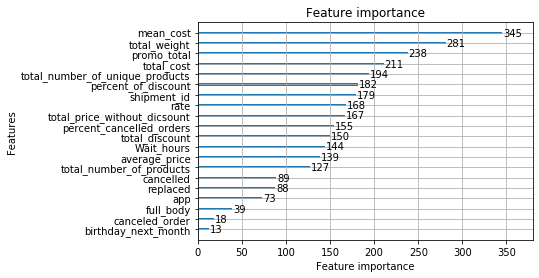

In [89]:
plot_importance(model)

In [109]:
Counter(final_train['target'])

Counter({1.0: 449459, 0.0: 243314})

### Все 1

## Merge c sample 1

In [128]:
data_08 = ships_final_address_agg[ships_final_address_agg['order_completed_at_month'] == '2020-08']

In [129]:
data_08_sample = data_08.merge(sample, how = 'inner', left_on='phone_id',
                                            right_on = 'Id')

In [130]:
data_08_sample['Predicted'] = model.predict(data_08_sample[x_columns]) #scaler.transform(

In [131]:
table_1 = data_08_sample[['phone_id', 'Predicted']]

In [132]:
sample_sub = sample.merge(table_1, how = 'left', left_on = 'Id', right_on = 'phone_id')[['Id', 'Predicted_y']]

In [133]:
sample_sub = sample_sub.fillna(0)

In [134]:
sample_sub.rename(columns={'Predicted_y': 'Predicted'}, inplace=True)

In [135]:
sample_sub['Predicted'] = sample_sub['Predicted'].apply(lambda x: int(x))

In [136]:
sample_sub.to_csv('my_submission_2_day_2.csv', index=None, sep = ',')

## Merge c sample 2

In [114]:
data_08 = ships_final_address_agg[ships_final_address_agg['order_completed_at_month'] == '2020-08']
data_07 = ships_final_address_agg[ships_final_address_agg['order_completed_at_month'] == '2020-07']

In [115]:
data_08_sample = data_08.merge(sample, how = 'inner', left_on='phone_id', right_on = 'Id')

In [116]:
Ids = set(sample['Id']) - set(data_08_sample['phone_id'])   #55397

In [117]:
data_07_sample = data_07.merge(sample.loc[sample['Id'].isin(Ids)], how = 'inner', left_on='phone_id', right_on = 'Id')

In [118]:
Ids = Ids - set(data_07_sample['phone_id']) #2

In [119]:
Ids

{183298, 245784}

In [120]:
data_08_sample['Predicted'] = model.predict(data_08_sample[x_columns])
data_07_sample['Predicted'] = model.predict(data_07_sample[x_columns])

In [121]:
table_1 = pd.concat([data_08_sample[['phone_id', 'Predicted']],data_07_sample[['phone_id', 'Predicted']]])

In [122]:
sample_sub = sample.merge(table_1, how = 'left', left_on = 'Id', right_on = 'phone_id')[['Id', 'Predicted_y']]

In [123]:
sample_sub = sample_sub.fillna(0)

In [124]:
sample_sub.rename(columns={'Predicted_y': 'Predicted'}, inplace=True)

In [125]:
sample_sub['Predicted'] = sample_sub['Predicted'].apply(lambda x: int(x))

In [126]:
sample_sub.to_csv('my_submission_2_day_1.csv', index=None, sep = ',')

In [127]:
sum(sample_sub['Predicted'])/len(sample_sub['Predicted'])

0.6069363353820203

In [74]:
import seaborn as sns

In [90]:
final_train['Month'] = final_train['order_completed_at_month'].apply(lambda x: int(x[5:]))

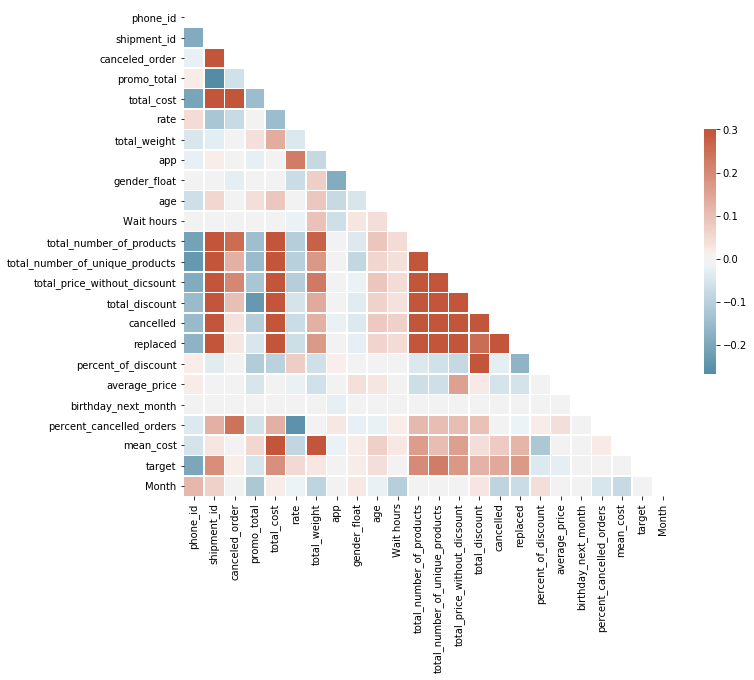

In [162]:
corr = final_train.corr() #[final_train['order_completed_at_month'] == '2020-07']
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [154]:
final_train[final_train['phone_id'] == 28].iloc[:, :20]

,phone_id,order_completed_at_month,shipment_id,canceled_order,promo_total,total_cost,rate,total_weight,app,gender_float,age,Wait hours,total_number_of_products,total_number_of_unique_products,total_price_without_dicsount,total_discount,cancelled,replaced,percent_of_discount,average_price
74,28,2020-03,4,0,0.0,888.0,0,43578.5,0,NaN,NaN,19.393611,512.0,340.0,55739.760031,17973.619997,16.0,22.0,35.381121,103.429751
75,28,2020-04,2,0,-250.0,316.0,5,23433.0,1,NaN,NaN,12.578333,152.0,130.0,19649.949957,1508.319998,4.0,6.0,9.581368,134.995903
76,28,2020-05,2,1,0.0,398.0,0,19039.5,1,NaN,NaN,3.638333,117.0,95.0,9650.150046,1038.700003,0.0,4.0,9.845550,82.395506
77,28,2020-06,1,0,0.0,158.0,4,20720.0,1,NaN,NaN,3.883056,46.0,41.0,8369.509975,495.800005,1.0,0.0,5.923883,181.945869
